In [1]:
import tensorflow as tf
import numpy as np
import time

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles

In [50]:
DATA_TYPE='blobs'

# jumlah dari cluster, jika kita set data circles cukup 2 cluster aja cukup
if (DATA_TYPE == 'circle'):
    K=2
else:
    K=4

# Jumlah maksimum dari iterasi jika dalam looping nanti ada kondisi-kondisi yang belum terpenuhi
MAX_ITERS = 1000

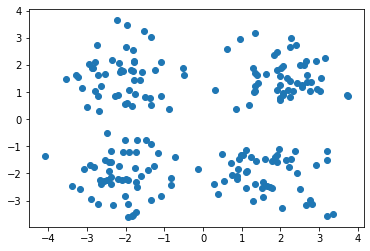

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [61]:
start = time.time()

# ini inisialisasi awal dari pusat cluster

centers = [(-2, -2), (-2, 1.5), (1.5, -2), (2, 1.5)]
if (DATA_TYPE == 'circle'):
    data, features = make_circles(n_samples=200, shuffle=True, noise= 0.01, factor=0.4)
else:
    data, features = make_blobs (n_samples=200, centers=centers, n_features = 2, cluster_std=0.8, shuffle=False, random_state=42)

# data berisi informasi koordinat
# features berisi tentang jenis noise dari cluster yang mana, isinya 1,2,3 dan 4
plt.scatter(data[:,0], data[:,1])
plt.show()
type(data)
data[:,1]
features

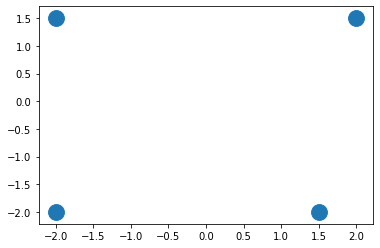

In [54]:
fig, ax = plt.subplots()
# disini hanya display centernya doang
ax.scatter(np.asarray(centers).transpose()[0], np.asarray(centers).transpose()[1], marker = 'o', s = 250)
plt.show()

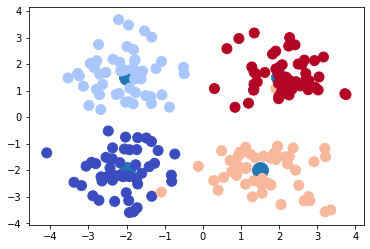

In [59]:
fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
#     dibawah ini parameter s adalah ukuran besarnya lingkaran diplot doang
    ax.scatter(np.asarray(centers).transpose()[0], np.asarray(centers).transpose()[1], marker = 'o', s = 250)
#     c = features ini yang menentukan warna apa digambar, karena isinya adalah 1 2 3 dan 4
    ax.scatter(data.transpose()[0], data.transpose()[1], marker = 'o', s = 100, c = features, cmap=plt.cm.coolwarm )
    plt.plot()

In [66]:
# menyimpan data ke tensorflow variabel di dalam variable points
points=tf.Variable(data)
# N ini nilainya 200, nantinya untuk menyimpan data dari cluster mana point dalam index tertentu
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))
cluster_assignments

<tf.Variable 'Variable_36:0' shape=(200,) dtype=int64_ref>

In [69]:
# centroid ini adalah koordinat dari centroid yang akan digunakan sebagai pusat, langsung ambil semabrang aja untuk nilai 
# centroid awalnya
centroids = tf.Variable(tf.slice(points.initialized_value(), [0,0], [K,2]))

In [70]:
# kita coba akan eksekusi untuk tau nilai dari centroid, pokoknya gini kalau mau pake di tensorflow, 
# memang ada beda dengan cara biasa
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [79]:
# setelah sess udah di initialize baru bisa di run centroidnya
sess.run(centroids)
# points.eval(sess)

array([[-1.60262868, -2.11061144],
       [-1.48184917, -0.78157611],
       [-2.1873227 , -2.18730957],
       [-0.73662975, -1.38605222]])

In [94]:
# ingat bahwa N=200, k =4 untuk BLOB 
# rep_centroid isinya 200(titik) x 4(centroid) x 2(koordinat), ya tentunya isinya 4 koordinat dari centroid
rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, 2])
# kalau rep_points isinya 1 point di repeat 4 kali dalam 1 array
rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, 2])
# nah kemudian dibandingkan si point rep dikurangi dengan centroid rep, dari sini akan ketahuan jaraknya
# variabel sum_squares menyimpan informasi jumlah euclidean distance dari masing masing point,
# jadi masing2 ada 4 untuk tiap point
sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids), 
reduction_indices=2)


sum_squares.eval(session=sess)
sum_squares

<tf.Tensor 'Sum_16:0' shape=(200, 4) dtype=float64>

In [99]:
# dari 4 centroid sebelumnya kita ambil 1 terbaik dengan nilai minimum, yang berarti jaraknya terdekat 
best_centroids = tf.argmin(sum_squares, 1)
best_centroids.eval(session=sess)

array([0, 1, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 1, 0, 0, 2, 3, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3,
       1, 3], dtype=int64)

In [100]:
# mengecek, apakah ada perubahan cluster antara 
did_assignments_change = tf.reduce_any(tf.not_equal(best_centroids, cluster_assignments))
did_assignments_change.eval(session=sess)

True

In [101]:
# kita definisikan salahs atu fungsi yang gunanya untuk menghitung centroid baru dengan 
# menghitung rata rata dari anggota tiap cluster kalau dibawah ini disebut ember alias bucket, 
# nilai rata rata tiap bucket akan menjadi centroid baru untuk bucket tersebut, 
# kemudian kita clustering lagi berdasar centroid baru ini
def bucket_mean(data, bucket_ids, num_buckets):
    total = tf.unsorted_segment_sum(data, bucket_ids, num_buckets)
    count = tf.unsorted_segment_sum(tf.ones_like(data), bucket_ids, num_buckets)
    return total / count

In [103]:
# variable means akan menjadi centroid baru
means = bucket_mean(points, best_centroids, K)
means.eval(session=sess)

array([[-1.39084641, -2.37524434],
       [-1.81958467,  1.30888823],
       [-2.48871427, -2.35871549],
       [ 1.87437709, -0.34414179]])

In [104]:
# kodingan dibawah ini berarti selama did_assigments_change bernilai true, 
# maka akan dilakukan update centroidnya dengan means yang baru
with tf.control_dependencies([did_assignments_change]):
    do_updates = tf.group(
    centroids.assign(means),
    cluster_assignments.assign(best_centroids))

In [105]:
# untuk ngereset aja persiapan di bawahnya
changed = True
iters = 0

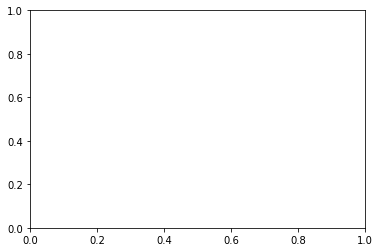

In [106]:
# gak penting cuman ngasih warna aja
fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
    colourindexes=[2,1,4,3]
else:
    colourindexes=[2,1]

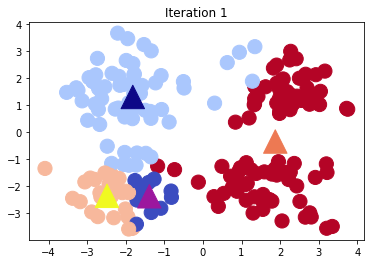

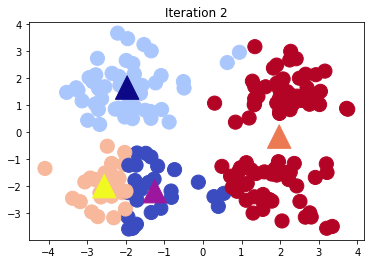

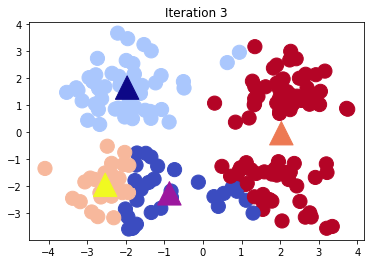

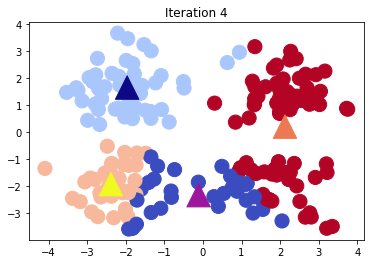

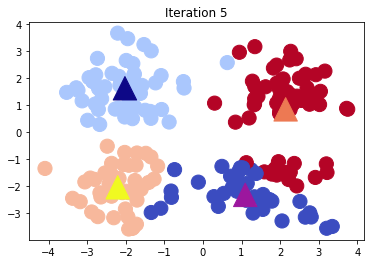

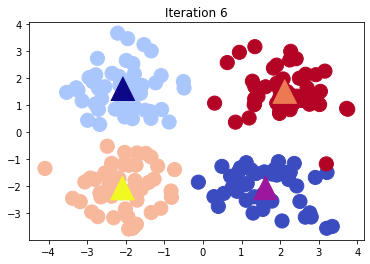

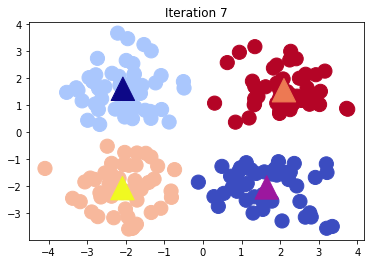

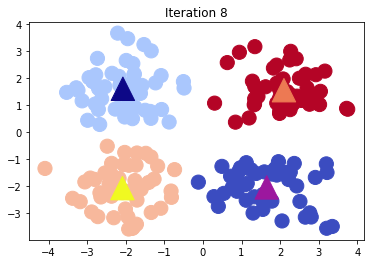

In [107]:
while changed and iters < MAX_ITERS:
    fig, ax = plt.subplots()
    iters += 1
    [changed, _] = sess.run([did_assignments_change, do_updates])
    [centers, assignments] = sess.run([centroids, cluster_assignments])
    ax.scatter(sess.run(points).transpose()[0], sess.run(points).transpose()[1], marker = 'o', s = 200, c = assignments, cmap=plt.cm.coolwarm )
    ax.scatter(centers[:,0],centers[:,1], marker = '^', s = 550, c = colourindexes, cmap=plt.cm.plasma)
    ax.set_title('Iteration ' + str(iters))

In [109]:
ax.scatter(sess.run(points).transpose()[0], sess.run(points).transpose()[1], marker = 'o', s = 200, c = assignments, cmap=plt.cm.coolwarm )
plt.show()

In [112]:

end = time.time()
print (("Found in %.2f seconds" % (end-start)), iters, "iterations")
print ("Centroids:")
print (centers)
print ("Cluster assignments:", assignments)

Found in 2729.70 seconds 8 iterations
Centroids:
[[ 1.65289262 -2.04643427]
 [-2.0763623   1.61204964]
 [-2.08862822 -2.07255306]
 [ 2.09831502  1.55936014]]
Cluster assignments: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
